# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Crypto Investment Product Inflows Hit Record $9 Billion YTD Aided by $ADA and $SOL.  Cryptocurrency investment products saw inflows of $151 million last week, making it the 13th-consecutive week of inflows the market has seen. In total, a record $9 billion have been invested in these products, leading assets under management to a new high above $83 billion. According to a report published by CoinShares, the flagship cryptocurrency Bitcoin […] ... [| Skaityti daugiau](https://www.cryptoglobe.com/latest/2021/11/crypto-investment-product-inflows-hit-record-9-billion-ytd-aided-by-ada-and-sol/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- FDA expected to authorize Pfizer booster for all adults this week.  The FDA is expected to authorize Pfizer's Covid booster for all adults this week. A CDC advisory committee, ACIP, will meet on Friday to discuss boosters. ... [| Skaityti daugiau](https://www.nbcnews.com/health/health-news/fda-expected-authorize-pfizer-booster-adults-week-rcna5783) 

### Kainų kaita pandemijos metu

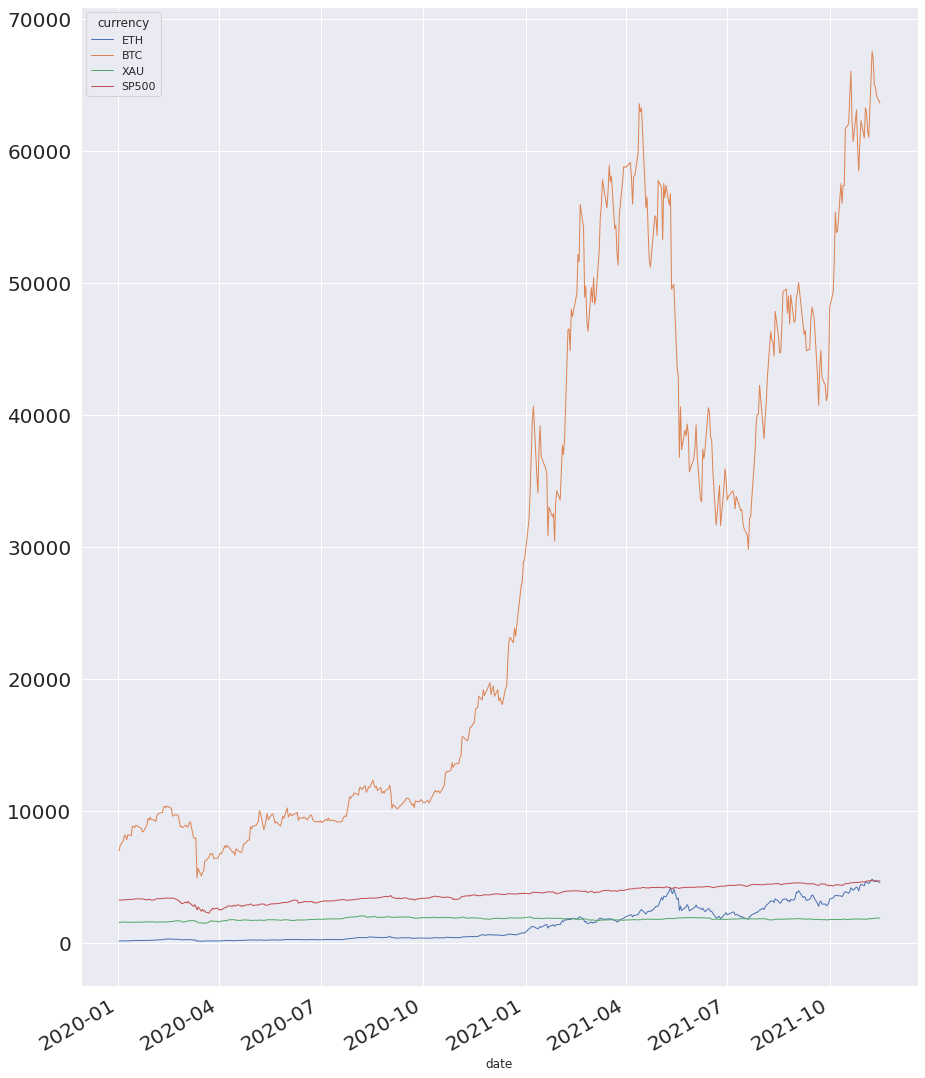

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.906460,0.153426,0.902051
BTC,0.906460,1.000000,0.128699,0.870282
XAU,0.153426,0.128699,1.000000,0.311649
SP500,0.902051,0.870282,0.311649,1.000000


In [8]:
#hide ### Koreliacijos matrica.

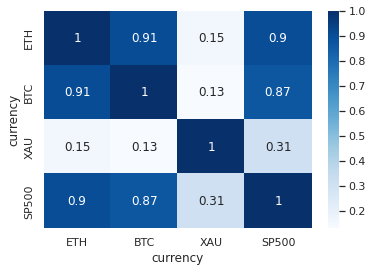

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')